In [1]:
%%capture
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
load_dotenv()
# Read your api key environment variable
my_key = os.getenv("NEWS_API")

In [3]:
from newsapi import NewsApiClient
# Create a newsapi client
newsapi = NewsApiClient(api_key=my_key)

In [4]:
# Fetch the SupplyChain news articles
SupplyChains = newsapi.get_everything(q="Blockchain & Supply chain", language="en")
# Print total articles
print(f"Total articles about SupplyChains: {SupplyChains['totalResults']}")

Total articles about SupplyChains: 401


In [5]:
# Create the Supply Chain sentiment scores DataFrame
SupplyChain_sentiments = []

for article in SupplyChains["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        SupplyChain_sentiments.append({
            "compound": compound,
            "negative": neg,
            "neutral": neu,
            "positive": pos,
            "text": text,
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
df_SupplyChain = pd.DataFrame(SupplyChain_sentiments)

# Reorder DataFrame columns
cols = ["compound", "negative","neutral","positive", "text" ]
df_SupplyChain = df_SupplyChain[cols]

df_SupplyChain.head()

,compound,negative,neutral,positive,text
0,0.6705,0.0,0.845,0.155,Serving the supply chain and all of its stakeh...
1,0.0258,0.0,0.968,0.032,Annual car sales are unlikely to reach pre-COV...
2,0.6808,0.0,0.804,0.196,Posted 2021-02-05\r\nThe term decentralized fi...
3,0.3818,0.0,0.906,0.094,Sr. Director of Applied Innovation at Microsof...
4,0.2960,0.0,0.934,0.066,What happened\r\nShares of Future FinTech Grou...


In [6]:
df_SupplyChain.describe()

,compound,negative,neutral,positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.370911,0.005158,0.896632,0.098158
std,0.262688,0.022483,0.071558,0.064888
min,0.000000,0.000000,0.767000,0.000000
25%,0.152950,0.000000,0.839500,0.051500
50%,0.381800,0.000000,0.903000,0.097000
75%,0.599400,0.000000,0.948500,0.157000
max,0.765000,0.098000,1.000000,0.196000


In [7]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

import nltk
nltk.download('stopwords')

True

In [8]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [9]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub(' ', str(text))
    words = word_tokenize(re_clean)
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [10]:
# Create a new tokens column for Supply Chain
df_SupplyChain["tokens"] = df_SupplyChain.text.apply(tokenizer)
df_SupplyChain.head(5)

,compound,negative,neutral,positive,text,tokens
0,0.6705,0.0,0.845,0.155,Serving the supply chain and all of its stakeh...,"[serving, supply, chain, stakeholder, mean, su..."
1,0.0258,0.0,0.968,0.032,Annual car sales are unlikely to reach pre-COV...,"[annual, car, sale, unlikely, reach, pre, covi..."
2,0.6808,0.0,0.804,0.196,Posted 2021-02-05\r\nThe term decentralized fi...,"[posted, term, decentralized, finance, defi, r..."
3,0.3818,0.0,0.906,0.094,Sr. Director of Applied Innovation at Microsof...,"[sr, director, applied, innovation, microsoft,..."
4,0.2960,0.0,0.934,0.066,What happened\r\nShares of Future FinTech Grou...,"[happened, shares, future, fintech, group, nas..."


In [11]:
# Create a new tokens column for SupplyChain
df_SupplyChain["tokens"] = df_SupplyChain.text.apply(tokenizer)
df_SupplyChain.head(5)

,compound,negative,neutral,positive,text,tokens
0,0.6705,0.0,0.845,0.155,Serving the supply chain and all of its stakeh...,"[serving, supply, chain, stakeholder, mean, su..."
1,0.0258,0.0,0.968,0.032,Annual car sales are unlikely to reach pre-COV...,"[annual, car, sale, unlikely, reach, pre, covi..."
2,0.6808,0.0,0.804,0.196,Posted 2021-02-05\r\nThe term decentralized fi...,"[posted, term, decentralized, finance, defi, r..."
3,0.3818,0.0,0.906,0.094,Sr. Director of Applied Innovation at Microsof...,"[sr, director, applied, innovation, microsoft,..."
4,0.2960,0.0,0.934,0.066,What happened\r\nShares of Future FinTech Grou...,"[happened, shares, future, fintech, group, nas..."


In [12]:
from collections import Counter
from nltk import ngrams

In [13]:
# Generate the Supply Chain N-grams where N=2
processed_SupplyChain = tokenizer(df_SupplyChain['tokens'])
bigrams_count = Counter(ngrams(processed_SupplyChain, n=2))
bigrams_SupplyChain = (dict(bigrams_count))
bigrams_SupplyChain

{('serving', 'supply'): 1,
 ('supply', 'chain'): 1,
 ('chain', 'stakeholder'): 1,
 ('stakeholder', 'mean'): 1,
 ('mean', 'su'): 1,
 ('su', 'annual'): 1,
 ('annual', 'car'): 1,
 ('car', 'sale'): 1,
 ('sale', 'unlikely'): 1,
 ('unlikely', 'reach'): 1,
 ('reach', 'pre'): 1,
 ('pre', 'covi'): 1,
 ('covi', 'posted'): 1,
 ('posted', 'term'): 1,
 ('term', 'decentralized'): 1,
 ('decentralized', 'finance'): 1,
 ('finance', 'defi'): 1,
 ('defi', 'r'): 1,
 ('r', 'sr'): 1,
 ('sr', 'director'): 1,
 ('director', 'applied'): 1,
 ('applied', 'innovation'): 1,
 ('innovation', 'microsoft'): 1,
 ('microsoft', 'happened'): 1,
 ('happened', 'share'): 1,
 ('share', 'future'): 1,
 ('future', 'fintech'): 1,
 ('fintech', 'group'): 1,
 ('group', 'na'): 1,
 ('na', 'internet'): 1,
 ('internet', 'security'): 1,
 ('security', 'data'): 1,
 ('data', 'protection'): 1,
 ('protection', 'concept'): 1,
 ('concept', 'nfts'): 1,
 ('nfts', 'non'): 1,
 ('non', 'fungible'): 1,
 ('fungible', 'token'): 1,
 ('token', 'nft'): 1,


In [14]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [15]:
SupplyChain_token = tokenizer(df_SupplyChain.text.str.cat())
# Get the top 10 words for Supply Chain
SupplyChain_ten = str(token_count(SupplyChain_token, 10))
SupplyChain_ten

"[('char', 19), ('supply', 8), ('chain', 7), ('technology', 7), ('blockchain', 6), ('prnewswire', 5), ('market', 5), ('digital', 4), ('covid', 3), ('finance', 3)]"

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'SupplyChain Word Cloud')

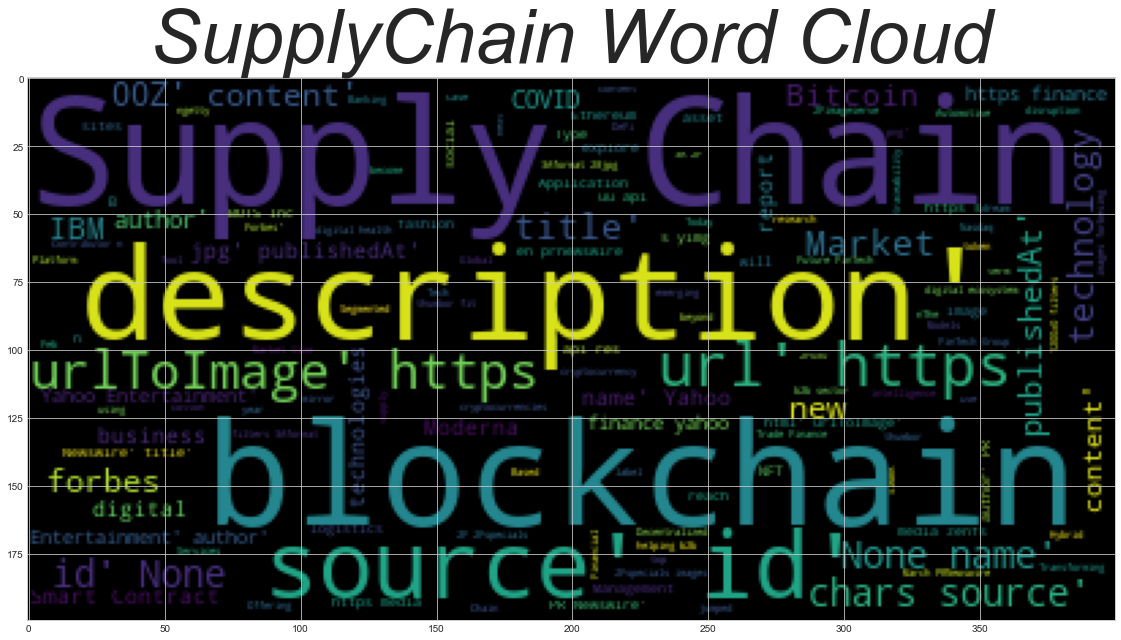

In [17]:
# Generate the Supply Chain word cloud
wc = WordCloud().generate(str(SupplyChains))
plt.imshow(wc)
plt.title("SupplyChain Word Cloud", fontsize=75, fontstyle='italic')

In [18]:
import spacy
from spacy import displacy

In [19]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [20]:
# Concatenate all of the Supply Chain text together
SupplyChain_ner = df_SupplyChain['text'].str.cat()

In [21]:
# Run the NER processor on all of the text
processed_article = nlp(SupplyChain_ner)
# Add a title to the document
processed_article.user_data['title'] = 'Supply Chain'

In [22]:
# Render the visualization
displacy.render(processed_article, style='ent')